### <center>Nabila Annisa Ryanthika</center>
#### <center>F1D022016</center>

# Jurnal Modul 4

code berikut merupakan library yang dipakai pada jurnal modul 1 ini.
1.import numpy berfungsi sebagai menampilkan nilai matriks yang berbentuk array
2.import matplotlib/plt berfungsi sebagai menampilkan sebbuah histogram yang ada dibawah
3.import cv2 berfungsi untuk menampilkan gambar pada python
4.import matplotlib.image as mpimg berfungsi untuk menampilkan gambar yang di import ke dalam python

In [93]:
import matplotlib.pyplot as plt
import matplotlib.image as img 
import cv2 as cv
import numpy as np

kode dibawah berfungsi sebagai mengconvert color dari beberapa layer menjadi satu layer yaitu abu saja, yang sebelumnya ada beberapa warna dari layer digabung menjadi satu layer yang menghasilkan warna abu dan plt berfungsi untuk menampilkan gambar yang berwarna abu dengan color mapnya gray

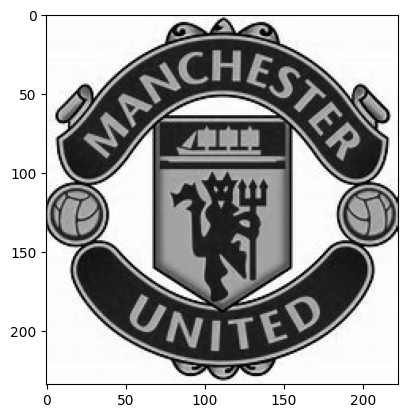

In [94]:
img = img.imread("manchester_united.jpeg")

grayImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.imshow(grayImage, cmap="gray")

# Mean Filtering

In [95]:
kernelm_3 = np.full((3,3), 1/9)

kernelm_9 = np.full((9,9), 1/81)

def filter(image, kernel):
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)


    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    for i in range(heightImage):
         for j in range(widthImage):
             helper = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     helper += image[i+k, j+l] * kernel[k, l]
             result[i, j] = helper
    return result

Text(0.5, 1.0, 'Mean 9x9')

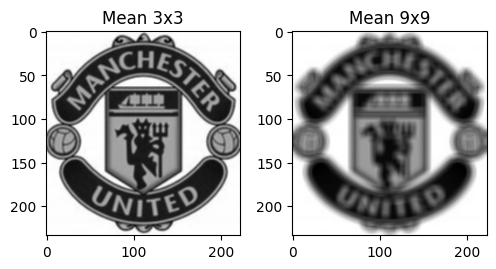

In [96]:
mean_3 = filter(grayImage, kernelm_3)
mean_9 = filter(grayImage, kernelm_9)

figure = plt.figure(figsize = [9, 9])
    
figure.add_subplot(3, 3, 1)
plt.imshow(mean_3, cmap ='gray')
plt.title ('Mean 3x3')
    
figure.add_subplot(3, 3, 2)
plt.imshow(mean_9, cmap ='gray')
plt.title ('Mean 9x9')

# Modus Filtering

In [97]:
kernelmd_3 = np.full((3,3), 0)

kernelmd_9 = np.full((9,9), 0)

In [98]:
def modus(arr):
    count = {}
    for num in arr:
        if num in count:
            count[num] += 1
        else:
            count[num] = 1

    max_count = 0
    modus = None
    for num in count:
        if count[num] > max_count:
            max_count = count[num]
            modus = num
    return modus

In [99]:
def filtermd(image, kernel):
    heightImage, widthImage = image.shape
    heightKernel, widthKernel = kernel.shape
    heigthCenter = int((heightKernel - 1)/2)
    widthCenter = int((widthKernel - 1)/2)

    
    leftPad = widthCenter
    rightPad = widthKernel - widthCenter
    topPad = heigthCenter
    botPad = heightKernel - heigthCenter
    image = np.pad(image, ((leftPad, rightPad), (topPad, botPad)), mode='edge')

    result = np.zeros([heightImage, widthImage])
    for i in range(heightImage):
         for j in range(widthImage):
             temp = np.zeros(len(kernel)*len(kernel))
             indeks = 0
             for k in range(heightKernel):
                 for l in range(widthKernel):
                     temp[indeks] += image[i+k,j+l]
                     indeks+=1
                     result[i,j] = modus(temp)
             
    return result

Text(0.5, 1.0, 'Modus 9x9')

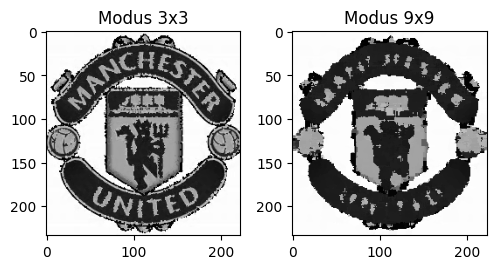

In [100]:
modus_3 = filtermd(grayImage, kernelmd_3)
modus_9 = filtermd(grayImage, kernelmd_9)

figure = plt.figure(figsize = [9, 9])
    
figure.add_subplot(3, 3, 1)
plt.imshow(modus_3, cmap ='gray')
plt.title ('Modus 3x3')
    
figure.add_subplot(3, 3, 2)
plt.imshow(modus_9, cmap ='gray')
plt.title ('Modus 9x9')